In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels

In [3]:
df = pd.read_csv('US_Crime_Rates_1960_2014.csv')
df

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
5,1965,193526000,4739400,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
6,1966,195576000,5223500,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
7,1967,197457000,5903400,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
8,1968,199399000,6720200,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600
9,1969,201385000,7410900,661870,6749000,14760,37170,298850,311090,1981900,3888600,878500


简单看下相关性

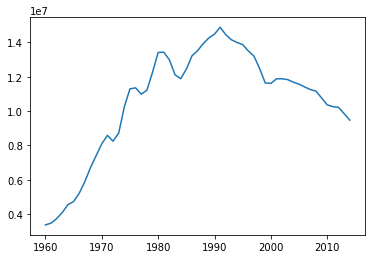

In [4]:
plt.plot(df.Year,df.Total)

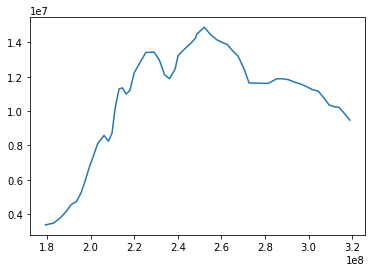

In [5]:
plt.plot(df.Population,df.Total)

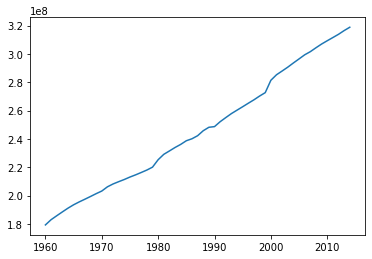

In [6]:
plt.plot(df.Year,df.Population)

总数回归和预测

In [7]:
import statsmodels.api as sm

X = np.column_stack((np.array(df.Year)**2,np.array(df.Year)))
Y = np.array(df.Total/df.Population)
X = sm.add_constant(X)

model = sm.OLS(Y,X)
results = model.fit()
[a,b,r] = results.params
results.params

array([-1.91719623e+02, -4.85078762e-05,  1.92899855e-01])

0.00957011697857979


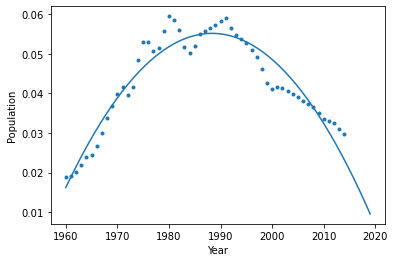

In [8]:
plt.scatter(df.Year,df.Total/df.Population,marker='.')
plt.xlabel('Year')
plt.ylabel('Population')
eg_x = np.linspace(start=df.Year[0],stop=2019,num=len(df))
eg_y = a + b*eg_x**2 + r*eg_x
plt.plot(eg_x,eg_y)
print(eg_y[-1])

各项犯罪率的变化情况

In [9]:
df.columns

Index(['Year', 'Population', 'Total', 'Violent', 'Property', 'Murder',
       'Forcible_Rape', 'Robbery', 'Aggravated_assault', 'Burglary',
       'Larceny_Theft', 'Vehicle_Theft'],
      dtype='object')

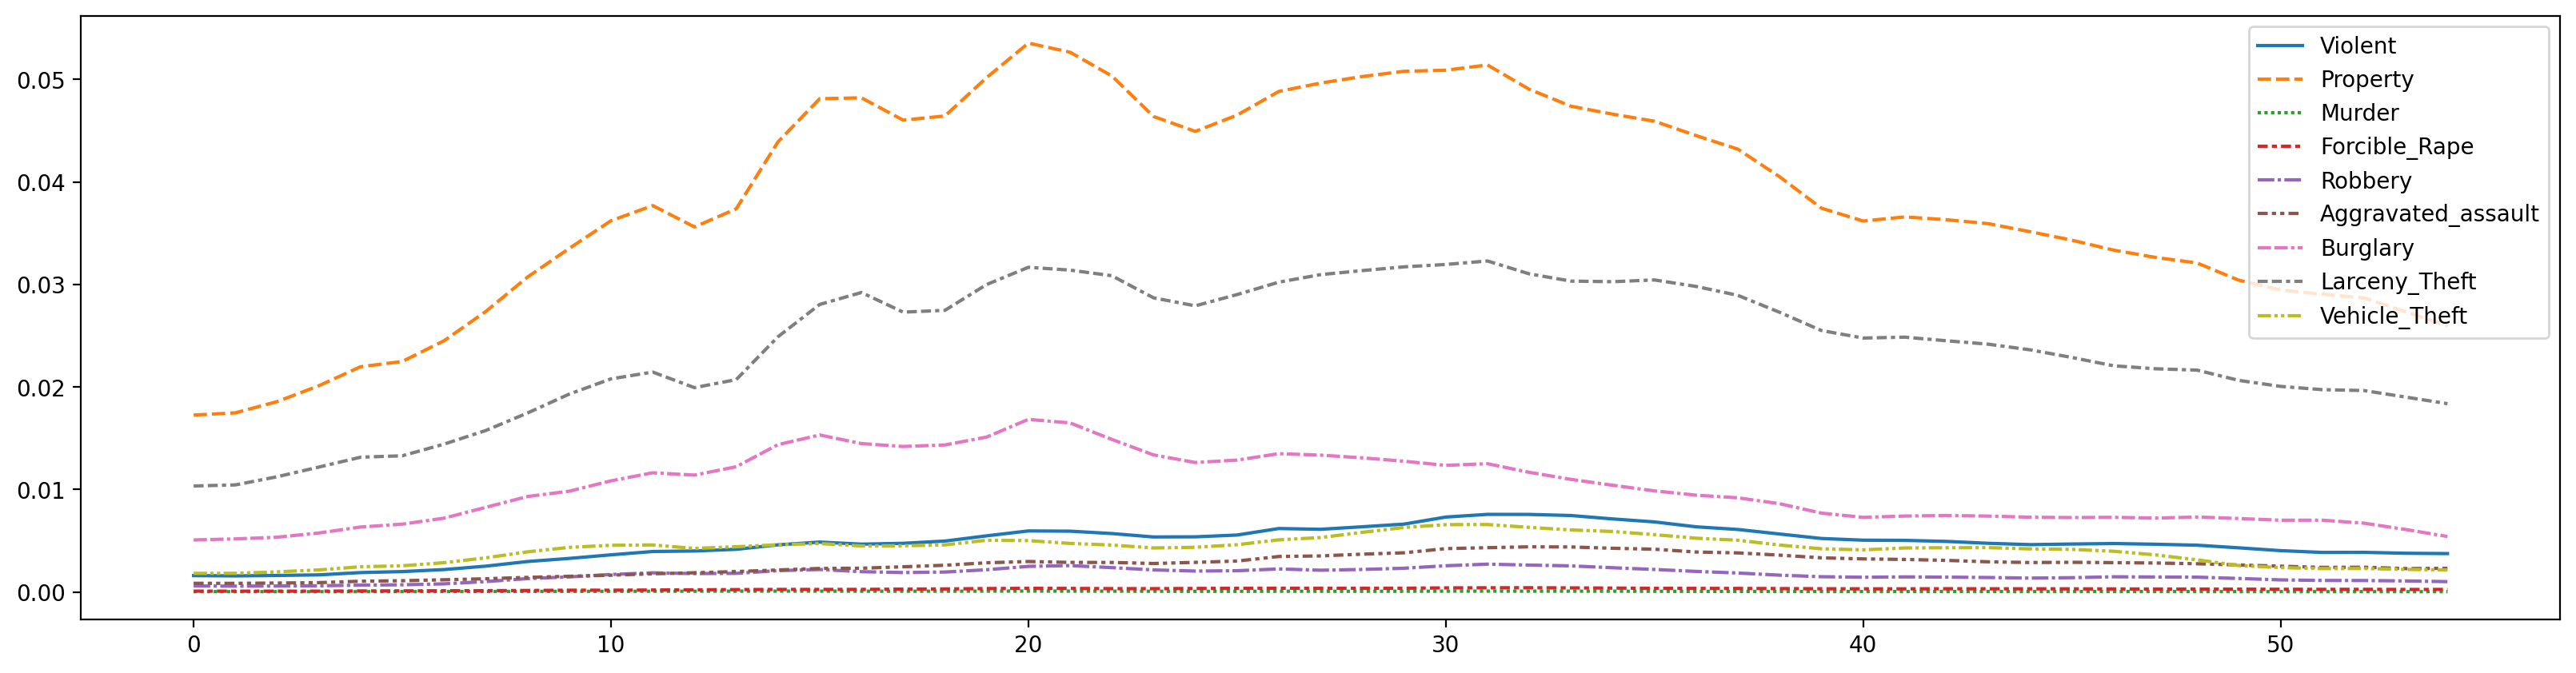

In [10]:
crimes = ['Violent', 'Property', 'Murder','Forcible_Rape', 'Robbery', 'Aggravated_assault', 'Burglary','Larceny_Theft', 'Vehicle_Theft']
crime_rate_df = {}
for i in crimes:
    crime_rate = df[i]/df.Population
    crime_rate_df[i] = crime_rate
plt.figure(figsize=[20,5],dpi=200)
sns.lineplot(data=crime_rate_df)
plt.legend(loc='upper right')

各项犯罪率预测

Violent in 2019: 0.0016363498068940885
Property in 2019: 0.007890453782465556
Murder in 2019: 7.90647365334074e-06
Forcible_Rape in 2019: 0.00015448625274760985
Robbery in 2019: -1.6833354067102846e-05
Aggravated_assault in 2019: 0.001449581047459958
Burglary in 2019: -0.0008037971053056481
Larceny_Theft in 2019: 0.008381363380806306
Vehicle_Theft in 2019: 0.0003145912014375085


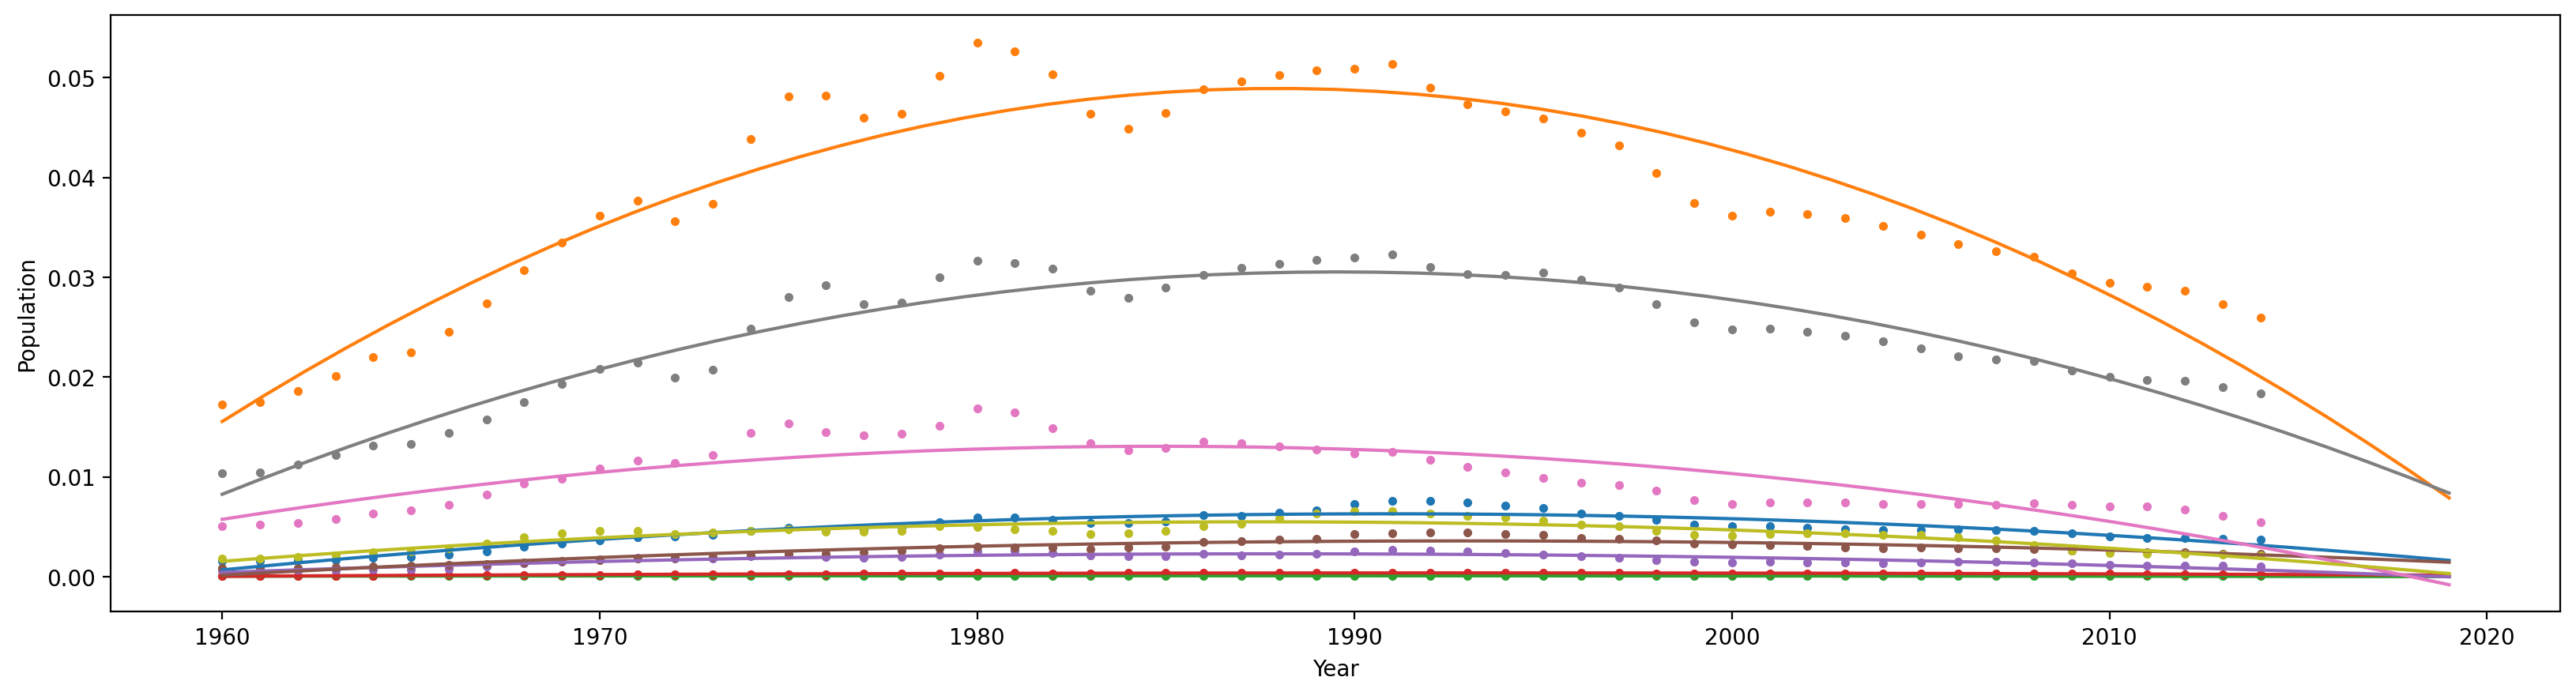

In [11]:
plt.figure(figsize=[20,5],dpi=200)
for i in crimes:
    X = np.column_stack((np.array(df.Year)**2,np.array(df.Year)))
    Y = np.array(df[i]/df.Population)
    X = sm.add_constant(X)

    model = sm.OLS(Y,X)
    results = model.fit()
    [a,b,r] = results.params

    plt.scatter(df.Year,df[i]/df.Population,marker='.')
    plt.xlabel('Year')
    plt.ylabel('Population')
    eg_x = np.linspace(start=df.Year[0],stop=2019,num=len(df))
    eg_y = a + b*eg_x**2 + r*eg_x

    plt.plot(eg_x,eg_y)
    # plt.legend(loc='upper right')    
    print(i,'in 2019:',eg_y[-1])
